In [2]:
from glob import glob
import pickle

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
file_list = glob('data4/*')

In [5]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        all_data_dicts[filename[12]].append(this_dict)




In [6]:
all_data_dicts

{'S': [{'sig_ratio': 0.15,
   'dimension': 50,
   'result': [[50, 0], [50, 0], [50, 0], [50, 0]]},
  {'sig_ratio': 0.1,
   'dimension': 35,
   'result': [[35, 0], [35, 0], [35, 0], [35, 0]]},
  {'sig_ratio': 0.1,
   'dimension': 60,
   'result': [[60, 0], [60, 0], [60, 0], [60, 0]]},
  {'sig_ratio': 0.05,
   'dimension': 40,
   'result': [[40, -1], [40, 0], [40, 0], [40, 0]]},
  {'sig_ratio': 0.1,
   'dimension': 1,
   'result': [[1, 0], [1, 0], [1, 0], [1, 0]]},
  {'sig_ratio': 0.01,
   'dimension': 1,
   'result': [[1, -1], [1, -1], [1, -1], [1, -1]]},
  {'sig_ratio': 0.02,
   'dimension': 6,
   'result': [[6, -1], [6, -1], [6, -1], [6, -1]]},
  {'sig_ratio': 0.002,
   'dimension': 2,
   'result': [[2, 0], [2, -1], [2, -1], [2, -1]]},
  {'sig_ratio': 0.05,
   'dimension': 6,
   'result': [[6, -1], [6, -1], [6, -1], [6, 1]]},
  {'sig_ratio': 0.05,
   'dimension': 4,
   'result': [[4, -1], [4, 1], [4, 0], [4, -1]]},
  {'sig_ratio': 0.02,
   'dimension': 4,
   'result': [[4, 0], [4, -1]

In [7]:
numbers_S = {}
for event in all_data_dicts['S']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_S:
        numbers_S[sig_ratio] = max(numbers_S[sig_ratio], dim)
    else:
        numbers_S[sig_ratio] = dim

In [8]:
numbers_S

{0.15: 100,
 0.1: 100,
 0.05: 100,
 0.01: 1,
 0.02: 6,
 0.002: 4,
 0.004: 2,
 0.006: 1,
 0.001: 2}

In [9]:
numbers_M = {}
for event in all_data_dicts['M']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_M:
        numbers_M[sig_ratio] = max(numbers_M[sig_ratio], dim)
    else:
        numbers_M[sig_ratio] = dim

In [10]:
numbers_L = {}
for event in all_data_dicts['L']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_L:
        numbers_L[sig_ratio] = max(numbers_L[sig_ratio], dim)
    else:
        numbers_L[sig_ratio] = dim

In [11]:
numbers_XL = {}
for event in all_data_dicts['X']:
    sig_ratio, dim = event['sig_ratio'], event['dimension']
    if sig_ratio in numbers_XL:
        numbers_XL[sig_ratio] = max(numbers_XL[sig_ratio], dim)
    else:
        numbers_XL[sig_ratio] = dim

In [12]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [13]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XL = sort_dict(numbers_XL)

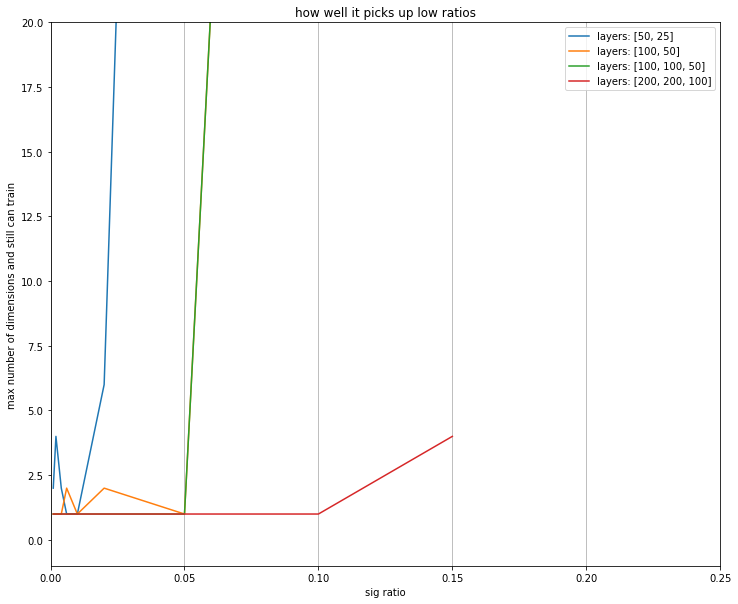

In [14]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XL.keys(), numbers_XL.values(),label = 'layers: [200, 200, 100]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.25))
ax.set_ylim((-1, 20))
ax.grid(axis="x", which = 'both')

plt.show()

In [15]:
export = {
    'S':numbers_S,
    'M':numbers_M,
    'L':numbers_L,
    'XL':numbers_XL
}

export

{'S': {0.001: 2,
  0.002: 4,
  0.004: 2,
  0.006: 1,
  0.01: 1,
  0.02: 6,
  0.05: 100,
  0.1: 100,
  0.15: 100},
 'M': {0.001: 1,
  0.002: 1,
  0.004: 1,
  0.006: 2,
  0.01: 1,
  0.02: 2,
  0.05: 1,
  0.1: 100,
  0.15: 100},
 'L': {0.001: 1,
  0.002: 1,
  0.004: 1,
  0.006: 1,
  0.01: 1,
  0.02: 1,
  0.05: 1,
  0.1: 100,
  0.15: 100},
 'XL': {0.001: 1,
  0.002: 1,
  0.004: 1,
  0.006: 1,
  0.01: 1,
  0.02: 1,
  0.05: 1,
  0.1: 1,
  0.15: 4}}

In [16]:
with open('data_export/main_no_box/res4.pickle', 'wb') as handle:
    pickle.dump(export, handle, protocol=pickle.HIGHEST_PROTOCOL)
